# Comparison and Analysis of Machine Learning Models to Predict Hotel Booking Cancellation

## Implementing the algorithm in this paper: https://www.atlantis-press.com/proceedings/icfied-22/125971599

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostClassifier


#### Step 1: Load and Read the Data (hotel_bookings.csv)

In [61]:
source_file = 'hotel_bookings.csv'
data = pd.read_csv(source_file)

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### Step 2: Preprocess the Data 

In [62]:
# we will use is_cancelled as the main label

label = data['is_canceled']
data.drop(['is_canceled'], axis = 1, inplace = True)

# separating the numerical and categorical data (only use numerical)

data_num = data.select_dtypes(["int64","float"])
data_cat = data.select_dtypes("object") # we will not use this

# standardize the data using preprocessing

data_std = preprocessing.scale(data_num)
data = pd.DataFrame(data = data_std)

# remove any rows that have a 0 

data.loc[(data != 0).any(1)]

# use MinMaxScaler for feature scaling

scaler = MinMaxScaler().fit(data)
data = scaler.transform(data)

array([[0.46404342, 0.        , 0.5       , ..., 0.00118009, 0.        ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.00118009, 0.        ,
        0.        ],
       [0.00949796, 0.        , 0.5       , ..., 0.01505259, 0.        ,
        0.        ],
       ...,
       [0.04613297, 1.        , 0.65384615, ..., 0.03035118, 0.        ,
        0.8       ],
       [0.14789688, 1.        , 0.65384615, ..., 0.02049061, 0.        ,
        0.        ],
       [0.27815468, 1.        , 0.65384615, ..., 0.02914704, 0.        ,
        0.4       ]])

### Step 3: Split the Data

In [66]:
x = data
y = label

# train test split
# the paper does not specify the test_size and random_state, so arbitrarily choose a good enough number

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 544)
print("Train Shape: ", X_train.shape)
print("Test Shape: ", X_test.shape)


Train Shape:  (83573, 19)
Test Shape:  (35817, 19)


### Step 4: Implement the CatBoost Classifier

In [67]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

# Making predictions
y_test_pred = cb.predict(X_test)


Learning rate set to 0.06818
0:	learn: 0.6544138	total: 251ms	remaining: 4m 10s
1:	learn: 0.6289262	total: 302ms	remaining: 2m 30s
2:	learn: 0.6046423	total: 361ms	remaining: 1m 59s
3:	learn: 0.5879956	total: 430ms	remaining: 1m 46s
4:	learn: 0.5753400	total: 491ms	remaining: 1m 37s
5:	learn: 0.5633108	total: 559ms	remaining: 1m 32s
6:	learn: 0.5546007	total: 625ms	remaining: 1m 28s
7:	learn: 0.5468273	total: 686ms	remaining: 1m 25s
8:	learn: 0.5374479	total: 751ms	remaining: 1m 22s
9:	learn: 0.5301320	total: 854ms	remaining: 1m 24s
10:	learn: 0.5237440	total: 922ms	remaining: 1m 22s
11:	learn: 0.5186156	total: 991ms	remaining: 1m 21s
12:	learn: 0.5140616	total: 1.07s	remaining: 1m 21s
13:	learn: 0.5083233	total: 1.15s	remaining: 1m 20s
14:	learn: 0.5047154	total: 1.56s	remaining: 1m 42s
15:	learn: 0.5015409	total: 1.8s	remaining: 1m 50s
16:	learn: 0.4979924	total: 2.04s	remaining: 1m 58s
17:	learn: 0.4947594	total: 2.21s	remaining: 2m
18:	learn: 0.4924566	total: 2.45s	remaining: 2m 6s

In [68]:
# Get metrics for the model

acc_score = accuracy_score(y_test, y_test_pred)
rec_score = recall_score(y_test, y_test_pred)
prec_score = precision_score(y_test, y_test_pred)
f1score = f1_score(y_test, y_test_pred)

print('Accuracy: ', acc_score)
print('Recall: ', rec_score)
print('Precision: ', prec_score)
print('F1 Score: ', f1score)

Accuracy:  0.8420303207973867
Recall:  0.7094972067039106
Precision:  0.8385082084225554
F1 Score:  0.768626809519915


### Step 6: Compare Results 

Note the difference in numbers because many assumptions were made as they were not specified in the paper:
- data split
- columns used
- number of iterations in CatBoost

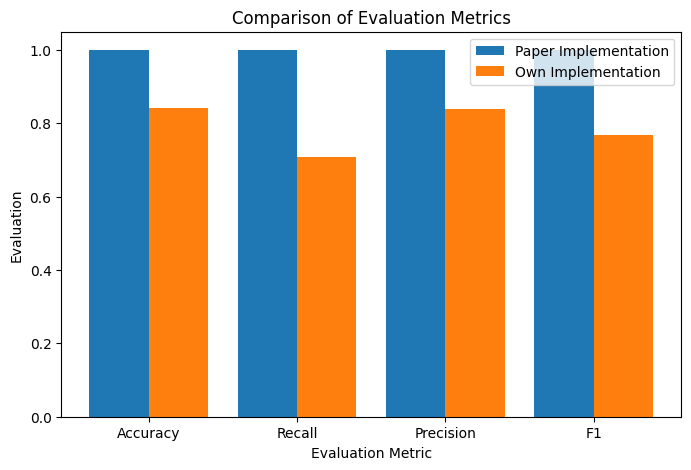

In [69]:
x = ['Accuracy','Recall','Precision', 'F1']

y_paper = [1, 1, 1, 1]
y_own = [acc_score, rec_score, prec_score, f1score]
  
x_axis = np.arange(len(x))

plt.figure(figsize = (8, 5))

plt.bar(x_axis - 0.2, y_paper, 0.4, label = 'Paper Implementation')
plt.bar(x_axis + 0.2, y_own, 0.4, label = 'Own Implementation')

plt.xticks(x_axis, x)
plt.xlabel("Evaluation Metric")
plt.ylabel("Evaluation")
plt.title("Comparison of Evaluation Metrics")
plt.legend()
plt.show()